## Optimizing Hospital Readmission Reduction Using Patient Clustering

### Step 1: Data Loading & Inspection

In [1]:
## Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Deep Mehta\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Deep Mehta\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
## Load the dataset
data = pd.read_csv('E://Pace - Sem//Sem - 4//Capstone//Capstone_Project//app//diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
##  Display Basic Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
## Displaying the shape of the dataset
data.shape

(101766, 50)

In [5]:
## Checking for missing values
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
# Get unique values per column to identify categorical variables
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

### Step 2: Handling Missing Values

In [7]:
data.replace('?', np.nan, inplace=True)

In [8]:
# Drop high-missing-value columns
data.drop(columns=['weight', 'medical_specialty', 'payer_code'], inplace=True)

In [9]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [10]:
# Fill missing values: Mode for categorical, Median for numerical
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':  # Categorical columns
            data[col] = data[col].fillna(data[col].mode()[0])
        else:  # Numerical columns
            data[col].fillna(data[col].median())

In [11]:
# Checking if any missing values remain
print("\nMissing Values After Handling:")
print(data.isnull().sum().sum())  # Should print 0 if all missing values are handled


Missing Values After Handling:
0


### Step 3: Encoding Categorical Variables

In [12]:
# Age: Convert to ordinal representation
age_mapping = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4,
    '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
}
data['age'] = data['age'].map(age_mapping)

In [13]:
# Gender Encoding: Male=1, Female=0
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# Readmission Encoding: NO=0, >30=1, <30=2
data['readmitted'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

In [14]:
# A model may misinterpret them as continuous numbers if left unencoded.
data = pd.get_dummies(data, columns=['race', 'discharge_disposition_id', 'admission_source_id'], drop_first=True)

In [15]:
# Medication encoding
medication_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]
medication_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
for col in medication_columns:
    data[col] = data[col].map(medication_mapping)

In [16]:
# Checking transformed dataset
print("\nTransformed Dataset Overview:")
data.head()


Transformed Dataset Overview:


,encounter_id,patient_nbr,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25
0,2278392,8222157,0.0,0,6,1,41,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,149190,55629189,0.0,1,1,3,59,0,18,0,...,False,False,False,False,False,False,False,False,False,False
2,64410,86047875,0.0,2,1,2,11,5,13,2,...,False,False,False,False,False,False,False,False,False,False
3,500364,82442376,1.0,3,1,2,44,1,16,0,...,False,False,False,False,False,False,False,False,False,False
4,16680,42519267,1.0,4,1,1,51,0,8,0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Checking categorical columns
print("Categorical Features:")
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Categorical Features:
Index(['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'examide',
       'citoglipton', 'change', 'diabetesMed'],
      dtype='object')


In [18]:
# Encode max_glu_serum and A1Cresult (Ordinal Encoding)
glu_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
data['max_glu_serum'] = data['max_glu_serum'].map(glu_mapping)

a1c_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
data['A1Cresult'] = data['A1Cresult'].map(a1c_mapping)

In [19]:
# Drop Irrelevant Columns
data.drop(columns=['examide', 'citoglipton'], inplace=True)

In [20]:
# Binary Encode change and diabetesMed
data['change'] = data['change'].map({'No': 0, 'Ch': 1})
data['diabetesMed'] = data['diabetesMed'].map({'No': 0, 'Yes': 1})

In [21]:
# grouping them into broader disease categories based on ICD-9 classifications.
def categorize_diagnosis(code):
    """Categorizes diagnosis codes into broad disease groups"""
    try:
        code = float(code)
        if 390 <= code <= 459 or code == 785: return "Circulatory"
        elif 460 <= code <= 519 or code == 786: return "Respiratory"
        elif 520 <= code <= 579 or code == 787: return "Digestive"
        elif 250 <= code < 251: return "Diabetes"
        elif 800 <= code <= 999: return "Injury"
        elif 710 <= code <= 739: return "Musculoskeletal"
        elif 580 <= code <= 629 or code == 788: return "Genitourinary"
        elif 140 <= code <= 239: return "Neoplasms"
        else: return "Other"
    except:
        return "Other"

# Apply function to diagnosis columns
data['diag_1'] = data['diag_1'].apply(categorize_diagnosis)
data['diag_2'] = data['diag_2'].apply(categorize_diagnosis)
data['diag_3'] = data['diag_3'].apply(categorize_diagnosis)

# One-hot encode the diagnosis categories
data = pd.get_dummies(data, columns=['diag_1', 'diag_2', 'diag_3'], drop_first=True)


In [39]:
# Identify columns related to diagnoses
diagnosis_cols = [col for col in data.columns if 'diag_' in col]

# Count how many diagnosis categories each patient falls into
data['chronic_conditions'] = data[diagnosis_cols].sum(axis=1)

# Verify if the column is created
print("Updated Columns:", data.columns)

Updated Columns: Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient',
       ...
       'diag_2_Respiratory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory',
       'chronic_conditions'],
      dtype='object', length=109)


In [22]:
data

,encounter_id,patient_nbr,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
0,2278392,8222157,0.0,0,6,1,41,0,1,0,...,True,False,True,False,False,False,False,False,False,False
1,149190,55629189,0.0,1,1,3,59,0,18,0,...,False,False,False,False,False,False,False,False,True,False
2,64410,86047875,0.0,2,1,2,11,5,13,2,...,False,False,False,False,False,False,False,False,True,False
3,500364,82442376,1.0,3,1,2,44,1,16,0,...,False,False,False,False,False,False,False,False,False,False
4,16680,42519267,1.0,4,1,1,51,0,8,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1.0,7,1,3,51,0,16,0,...,True,False,False,False,False,False,False,False,False,False
101762,443847782,74694222,0.0,8,1,5,33,3,18,0,...,True,False,False,True,False,False,False,False,False,False
101763,443854148,41088789,1.0,7,1,1,53,0,9,1,...,False,False,False,False,False,False,False,False,True,False
101764,443857166,31693671,0.0,8,2,10,45,2,21,0,...,True,False,False,False,False,True,False,False,False,False


In [23]:
# Checking categorical columns - Rechecking again
print("Categorical Features:")
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Categorical Features:
Index([], dtype='object')


### Step 4: Exploratory Data Analysis (EDA)

In [24]:
# Summary statistics
print("\n🔹 Basic Dataset Overview:")
print(data.info())

# Check numerical statistics
print("\n🔹 Numerical Summary:")
print(data.describe())

# Check first few rows
print("\n🔹 Sample Data:")
print(data.head())



🔹 Basic Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 108 entries, encounter_id to diag_3_Respiratory
dtypes: bool(69), float64(1), int64(38)
memory usage: 37.0 MB
None

🔹 Numerical Summary:
       encounter_id   patient_nbr         gender            age  \
count  1.017660e+05  1.017660e+05  101763.000000  101766.000000   
mean   1.652016e+08  5.433040e+07       0.462398       6.096702   
std    1.026403e+08  3.869636e+07       0.498587       1.594084   
min    1.252200e+04  1.350000e+02       0.000000       0.000000   
25%    8.496119e+07  2.341322e+07       0.000000       5.000000   
50%    1.523890e+08  4.550514e+07       0.000000       6.000000   
75%    2.302709e+08  8.754595e+07       1.000000       7.000000   
max    4.438672e+08  1.895026e+08       1.000000       9.000000   

       admission_type_id  time_in_hospital  num_lab_procedures  \
count      101766.000000     101766.000000       101766.000000   
mean         

C:\Users\Deep Mehta\AppData\Local\Temp\ipykernel_10848\1638458823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['readmitted'], palette="pastel")


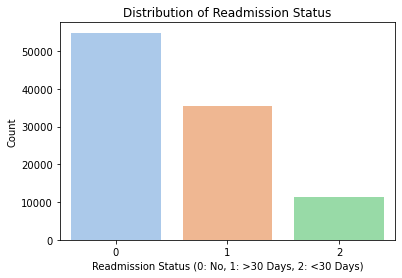

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=data['readmitted'], palette="pastel")
plt.xlabel("Readmission Status (0: No, 1: >30 Days, 2: <30 Days)")
plt.ylabel("Count")
plt.title("Distribution of Readmission Status")
plt.show()


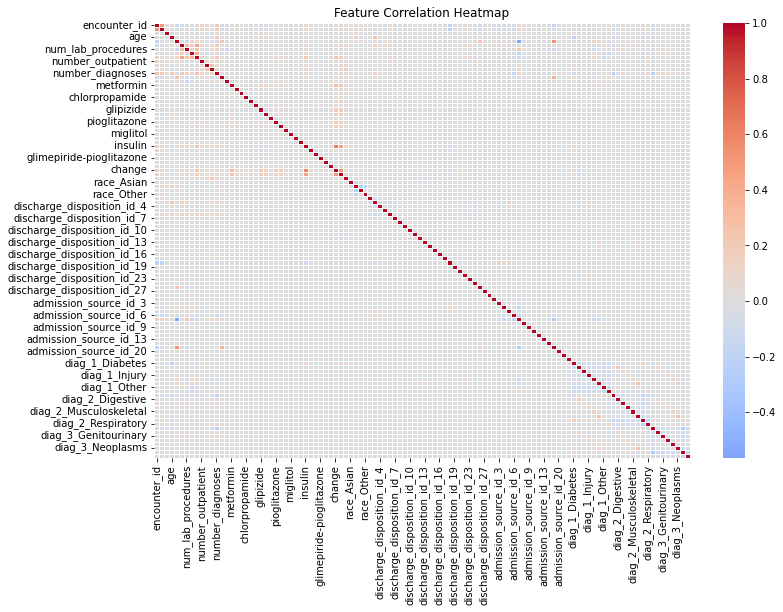

In [26]:
# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Weak Correlations with Readmission (readmitted)

No strong direct correlation between any single feature and readmission.
This suggests readmission is influenced by multiple factors rather than a single strong predictor.

### Features with Some Correlation
number_inpatient (number of inpatient visits) appears mildly correlated with readmission.
time_in_hospital also shows some correlation, suggesting that longer hospital stays may increase readmission risk.
number_diagnoses seems to have a slight influence, indicating that patients with multiple diagnoses might be at a higher risk.

### Potential Redundant Features
Some medication-related features (e.g., insulin, metformin) have minor correlations with each other.
Diagnosis groups (diag_1, diag_2, diag_3) are mostly independent but might have weak correlations within similar disease types.

C:\Users\Deep Mehta\AppData\Local\Temp\ipykernel_10848\2722638509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['gender'], palette="pastel")


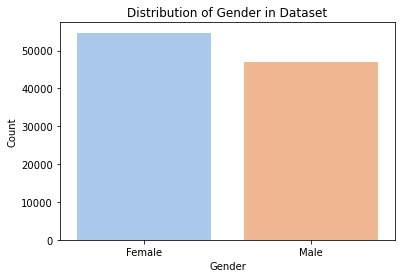

In [29]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data['gender'], palette="pastel")
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender in Dataset")
plt.show()

### More Female Patients Than Male Patients
The dataset contains slightly more female patients than male patients.
This is common in hospital datasets as women generally have higher healthcare utilization than men.

### Possible Bias in the Data
Since there are more female patients, we should check later if readmission rates differ by gender.
If males and females have different readmission risks, this could be an important factor in clustering.

C:\Users\Deep Mehta\AppData\Local\Temp\ipykernel_10848\1964845987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['readmitted'], y=data['time_in_hospital'], palette="coolwarm")


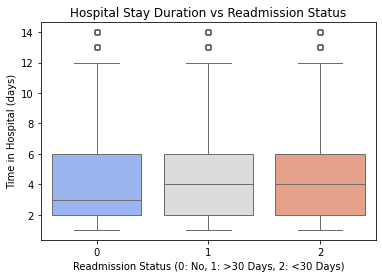

In [30]:
# Time in Hospital vs Readmission
plt.figure(figsize=(6,4))
sns.boxplot(x=data['readmitted'], y=data['time_in_hospital'], palette="coolwarm")
plt.xlabel("Readmission Status (0: No, 1: >30 Days, 2: <30 Days)")
plt.ylabel("Time in Hospital (days)")
plt.title("Hospital Stay Duration vs Readmission Status")
plt.show()


### Slightly Higher Hospital Stay for Readmitted Patients
Patients in the <30-day readmission group (2) tend to have a slightly higher median stay compared to those who were not readmitted.
This suggests that longer hospital stays could indicate more severe cases, leading to a higher chance of readmission.

### Outliers: Some Patients Stay Extremely Long
There are patients staying longer than 12 days, which are considered outliers.
These longer stays may require special handling in clustering since they represent extreme cases.

C:\Users\Deep Mehta\AppData\Local\Temp\ipykernel_10848\3035740767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['readmitted'], y=data['num_medications'], palette="coolwarm")


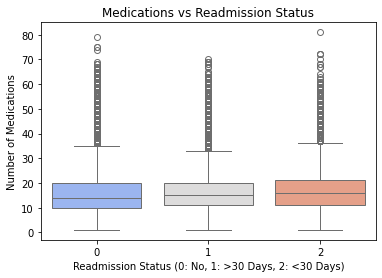

In [31]:
## Medications vs Readmission
plt.figure(figsize=(6,4))
sns.boxplot(x=data['readmitted'], y=data['num_medications'], palette="coolwarm")
plt.xlabel("Readmission Status (0: No, 1: >30 Days, 2: <30 Days)")
plt.ylabel("Number of Medications")
plt.title("Medications vs Readmission Status")
plt.show()


### Patients Who Take More Medications Tend to be Readmitted
The median number of medications is slightly higher for patients who were readmitted (>30 days and <30 days groups).
This suggests that patients on multiple medications might have more severe conditions, making them more prone to readmission.

### Presence of Outliers
Some patients have over 40-80 medications, which is unusually high.
These extreme cases might need to be handled separately to avoid skewing clustering results.

C:\Users\Deep Mehta\AppData\Local\Temp\ipykernel_10848\1908067878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['readmitted'], y=data['chronic_conditions'], palette="coolwarm")


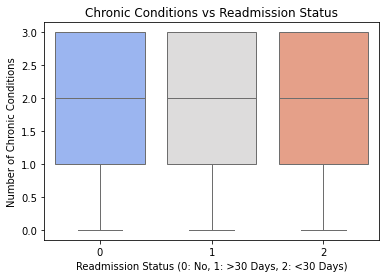

In [40]:
# Chronic Conditions vs Readmission
plt.figure(figsize=(6,4))
sns.boxplot(x=data['readmitted'], y=data['chronic_conditions'], palette="coolwarm")
plt.xlabel("Readmission Status (0: No, 1: >30 Days, 2: <30 Days)")
plt.ylabel("Number of Chronic Conditions")
plt.title("Chronic Conditions vs Readmission Status")
plt.show()

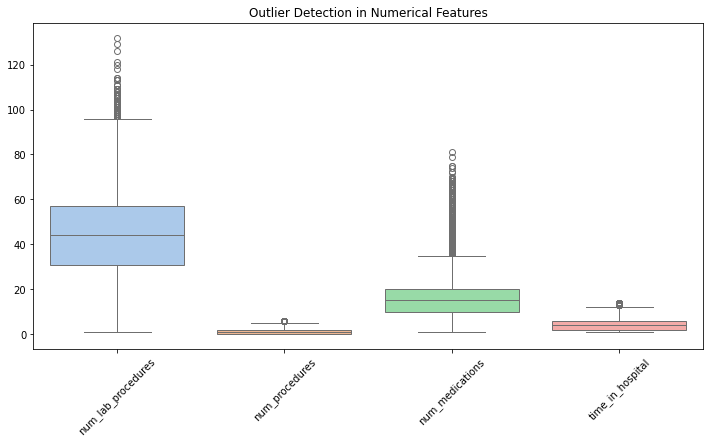

In [43]:
# Select numerical features for outlier detection
numerical_features = ['num_lab_procedures', 'num_procedures', 'num_medications', 'time_in_hospital']

# Boxplot for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=data[numerical_features], palette="pastel")
plt.xticks(rotation=45)
plt.title("Outlier Detection in Numerical Features")
plt.show()

### Extreme Outliers in num_lab_procedures and num_medications
Some patients have over 100 lab procedures, which is highly unusual.
The number of medications also shows extreme outliers (above 40).
These extreme values may distort clustering results if not handled properly.

### num_procedures is Mostly Normal
The values are closely packed with very few extreme values.
This feature might not need outlier treatment.

### time_in_hospital Has Moderate Outliers
Some patients stayed beyond 20 days, which is rare.
We may need to cap extreme values to prevent them from dominating clustering.

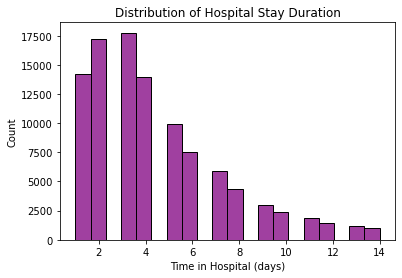

In [ ]:
# Convert to NumPy array explicitly
time_in_hospital_np = data['time_in_hospital'].to_numpy()

# Plot Hospital Stay Distribution
plt.figure(figsize=(6,4))
sns.histplot(time_in_hospital_np, bins=20, color="purple")
plt.xlabel("Time in Hospital (days)")
plt.ylabel("Count")
plt.title("Distribution of Hospital Stay Duration")
plt.show()


### Longer Stays Are Less Common
The number of patients declines sharply after 5 days.
Patients with 12+ day stays are rare, possibly indicating severe cases.

### Potential Outliers Beyond 10-12 Days
Patients staying more than 10 days could be high-risk cases.
We might need to normalize or cap outliers before clustering.

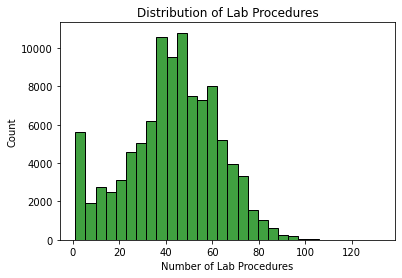

In [53]:
# Plot Lab Procedures Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['num_lab_procedures'], bins=30,  color="green")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Count")
plt.title("Distribution of Lab Procedures")
plt.show()

### Nearly Normal Distribution
Unlike time_in_hospital, num_lab_procedures is more balanced.
Most patients have between 20 and 70 lab procedures.

### Some Right-Skewness, but Not Extreme
A small number of patients have over 100 lab tests, but these cases are rare.
Since it's not highly skewed, transformation might not be necessary.

### Few Extreme Outliers Above 100
Patients with 100+ lab tests could represent critical cases.

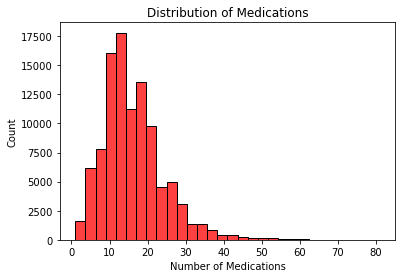

In [55]:
# Medications Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['num_medications'], bins=30, color="red")
plt.xlabel("Number of Medications")
plt.ylabel("Count")
plt.title("Distribution of Medications")
plt.show()


### Right-Skewed Distribution
Most patients take between 5 and 20 medications.
A small number of patients take more than 40 medications, indicating potential outliers.

### Extreme Cases Above 50 Medications
A few patients have over 60 medications, which is rare.
These extreme values may distort clustering results and require transformation.

### Possible Need for Log Transformation
Since num_medications is highly skewed, applying log transformation will reduce the impact of outliers.
This will prevent extreme values from dominating cluster assignments.

In [56]:
# Apply log transformation to highly skewed features
data['log_time_in_hospital'] = np.log1p(data['time_in_hospital'])
data['log_num_medications'] = np.log1p(data['num_medications'])

# Drop the original columns after transformation
data.drop(columns=['time_in_hospital', 'num_medications'], inplace=True)

# Verify the new transformed features
print(data[['log_time_in_hospital', 'log_num_medications']].describe())

       log_time_in_hospital  log_num_medications
count         101766.000000        101766.000000
mean               1.542959             2.722373
std                0.534160             0.489285
min                0.693147             0.693147
25%                1.098612             2.397895
50%                1.609438             2.772589
75%                1.945910             3.044522
max                2.708050             4.406719


### Outliers Compressed Effectively
Before Transformation: Extreme values for time in hospital (14+ days) and medications (80+).
After Transformation: The maximum values are now within a manageable range (2.7 and 4.4 instead of extreme values).

### Better Distribution for Clustering
The mean and median (50%) values are well-aligned, reducing the impact of extreme outliers.
No sudden jumps, ensuring a smoother feature space for clustering.